# 7: Agglomerative Clustering

## 7.1: Agglomerative Clustering

### Algorithm

This is a type of hierarchical clustering. First pairs of data points which are similar to each other are grouped together to form clusters. Then iteratively, the clusters are grouped together based on nearness criterion. This method is followed to form a heirarchy or a tree of clusters till we get back all the data merged to form a root. A cut can be taken at any point to visualize the groupings or cluster associations of each data point. 

### Using Scipy

In order to perform agglomerative clustering, we need to import two functions from the scipy.cluster.hierarchy library - dendrogram and linkage. The linkage function is the main function which calculates the distances between every combination of data points within the given data set, using the specified method and metric (Eg. linkage(data_set, method_of_distance_measurement, metric)). These distances so calculated are to be stored in a matrix. This function automatically classifies the data points into clusters with each iteration, merging data points/clusters which are closest to each other.

```python
from scipy.cluster.hierarchy import dendrogram, linkage

clust_dist = linkage(moon_df, 'average', 'euclidean')
```

### Dendogram

A dendrogram is a tree like structure which displays the clusters formed at each step. To visulize the clusters at any step, you need to take a cut. It provides a lot of information in terms of which data points were merged at that cut. A horizontal line in the dendrogram denotes the occurence of that cut and a merge. The vertical lines dropping from the ends of the horizontal line, point to the clusters (or data points) which were merged. The length of the vertical line (also referred to as height of the horizontal line) denotes the distance covered from the cluster. In subsequent iterations/merges, we can observe that the heights are different, because the distance between one cluster and the resulting cluster may not be the same.


<br/>
## Exercise:

Use the dendrogram function to show the agglomerative clustering performed on the dataset.

```python
DF = dendrogram(
    clust_dist,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
```
<img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2017/06/20/dendo-all.png'/>


The dendrogram shown can be truncated to show the last few merged clusters. 

- Truncate the dendogram to show last 12 merged clusters. Use the parameters:
 - truncate_mode='lastp',  # show only the last p merged cluster
 - p=12,  # show only the last p merged clusters
 - show_leaf_counts=True,  # otherwise numbers in brackets are counts

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


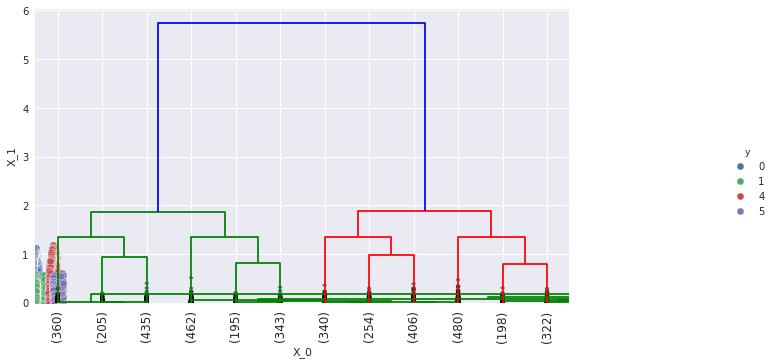

In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from scipy.cluster.hierarchy import dendrogram, linkage

import numpy as np
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# defining N, D and K

N_Samples = 1000
D = 2 
K = 4

X, y = make_moons(n_samples = 2*N_Samples, noise=0.05, shuffle = False)
x_vec, y_vec = make_moons(n_samples = 2*N_Samples, noise=0.08, shuffle = False)
x_vec[:,0] += 4
y_vec += 4
X = np.concatenate((X, x_vec), axis=0)
y = np.concatenate((y, y_vec), axis=0)

# converting the data set into a data frame and displaying the plot
moon_df = pd.DataFrame({'X_0':X[:,0],'X_1':X[:,1], 'y':y})
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="y", data = moon_df)
g.fig.set_size_inches(14, 6)
sns.despine()

# Calculating linkages among data points
clust_dist = linkage(moon_df, 'average', 'euclidean')

# Modify the code below 
DF = dendrogram(
clust_dist,
leaf_rotation=90., # rotates the x axis labels
leaf_font_size=8., # font size for the x axis labels
)

DF = dendrogram(
clust_dist,
truncate_mode='lastp', # show only the last p merged clusters
p=12, # show only the last p merged clusters
show_leaf_counts=True, # otherwise numbers in brackets are counts
leaf_rotation=90.,
leaf_font_size=12.,
show_contracted=True, # to get a distribution impression in truncated branches
)


<br/><br/><br/>
## 7.2: The Cut - Agglomerative Clustering

In the above dendrogram we can see that we truncated the agglomerative clustering iterations at a point where we can see that all data points were merged to formed 12 different clusters. We can now look up the clusters using 'fcluster' method from "scipy.cluster.heirarchy" library. To visualize what data points are associated with each cluster, import the library:

```python
from scipy.cluster.hierarchy import fcluster
k = 12
labels = fcluster(clustdist, k, criterion='maxclust')
```

To visualize the labels and verify the length,

```python
labels, len(labels)
(array([11, 11, 11, ...,  4,  4,  4], dtype=int32), 4000)
```

<br/>
## Exercise:

 - Visualize the cluster and assign the cluster labels to the column 'agglo'

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


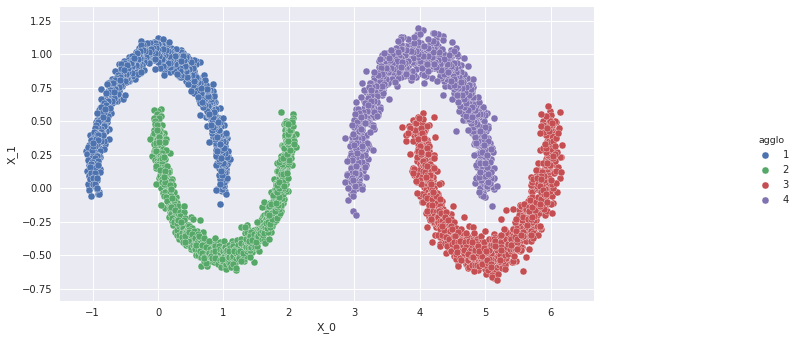

In [3]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculating linkages among data points
clust_dist = linkage(moon_df, 'average', 'euclidean')

k = 4
labels = fcluster(clust_dist, k, criterion='maxclust')

moon_df['agglo'] = labels
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="agglo", data = moon_df)
g.fig.set_size_inches(14, 6)
sns.despine()
sns.plt.show()